In [1]:
!pip install soundfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import soundfile
import numpy as np
import librosa
import glob
import os
from sklearn.model_selection import train_test_split

# all emotions on RAVDESS dataset
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# we allow only these emotions
AVAILABLE_EMOTIONS = {
    "angry",
    "sad",
    "neutral",
    "happy"
}

     

In [2]:
def extract_feature(file_name, **kwargs):
    """
    Extract feature from audio file `file_name`
        Features supported:
            - MFCC (mfcc)
            - Chroma (chroma)
            - MEL Spectrogram Frequency (mel)
            - Contrast (contrast)
            - Tonnetz (tonnetz)
        e.g:
        `features = extract_feature(path, mel=True, mfcc=True)`
    """
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma or contrast:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result = np.hstack((result, mel))
        if contrast:
            contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, contrast))
        if tonnetz:
            tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
            result = np.hstack((result, tonnetz))
    return result

In [10]:
!unzip "/content/drive/MyDrive/ml/SpeechEmotionRecognition/RAVDESS_Emotional_speech_audio.zip"

Archive:  /content/drive/MyDrive/ml/SpeechEmotionRecognition/RAVDESS_Emotional_speech_audio.zip
  inflating: Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Actor_01/03-01-02-02-02-02-01.wav  
  inflating: Actor_01/03-01-03-01-01-01-01.wav  
  inflating: Actor_01/03-01-03-01-01-02-01.wav  
  inflating: Actor_01/03-01-03-01-02-01-01.wav  
  inflating: Actor_01/03-01-03-01-02-02-01.wav  
  inflating: Actor_01/03-01-03-02-01-01-01.wav  
  inflating: Actor_01/03-01-03-02-01-02-01.wav  
  inflating: Actor_01/

In [3]:
def load_data(test_size=0.2):
    X, y = [], []
    try :
      for file in glob.glob("/content/Actor_*/*.wav"):
          # get the base name of the audio file
          basename = os.path.basename(file)
          print(basename)
          # get the emotion label
          emotion = int2emotion[basename.split("-")[2]]
          # we allow only AVAILABLE_EMOTIONS we set
          if emotion not in AVAILABLE_EMOTIONS:
              continue
          # extract speech features
          features = extract_feature(file, mfcc=True, chroma=True, mel=True)
          # add to data
          X.append(features)
          l={'happy':0.0,'sad':1.0,'neutral':3.0,'angry':4.0}
          y.append(l[emotion])

      for file in glob.glob("/content/audio_speech_actors_01-24/Actor_*/*.wav"):
          # get the base name of the audio file
          basename = os.path.basename(file)
          print(basename)
          # get the emotion label
          emotion = int2emotion[basename.split("-")[2]]
          # we allow only AVAILABLE_EMOTIONS we set
          if emotion not in AVAILABLE_EMOTIONS:
              continue
          # extract speech features
          features = extract_feature(file, mfcc=True, chroma=True, mel=True)
          # add to data
          X.append(features)
          l={'happy':0.0,'sad':1.0,'neutral':3.0,'angry':4.0}
          y.append(l[emotion])
    except :
         pass
    # split the data to training and testing and return it
    return train_test_split(np.array(X), y, test_size=test_size, random_state=7)
     


In [4]:
X_train, X_test, y_train, y_test = load_data(test_size=0.25)

print("[+] Number of training samples:", X_train.shape[0])
# number of samples in testing data
print("[+] Number of testing samples:", X_test.shape[0])

03-01-04-01-02-02-14.wav
03-01-07-01-02-01-14.wav
03-01-05-01-02-01-14.wav
03-01-04-02-01-01-14.wav
03-01-07-02-02-02-14.wav
03-01-08-01-02-02-14.wav
03-01-04-01-01-02-14.wav
03-01-06-02-01-02-14.wav
03-01-06-01-02-02-14.wav
03-01-05-02-02-02-14.wav
03-01-02-01-02-01-14.wav
03-01-05-02-02-01-14.wav
03-01-03-01-02-02-14.wav
03-01-02-01-01-02-14.wav
03-01-04-02-01-02-14.wav
03-01-01-01-01-02-14.wav
03-01-06-01-02-01-14.wav
03-01-08-02-01-02-14.wav
03-01-07-02-02-01-14.wav
03-01-05-01-02-02-14.wav
03-01-02-01-01-01-14.wav
03-01-03-02-02-01-14.wav
03-01-04-02-02-02-14.wav
03-01-08-01-01-01-14.wav
03-01-02-02-01-02-14.wav
03-01-05-02-01-02-14.wav
03-01-03-02-01-01-14.wav
03-01-07-01-01-01-14.wav
03-01-01-01-02-02-14.wav
03-01-06-01-01-02-14.wav
03-01-07-02-01-02-14.wav
03-01-05-02-01-01-14.wav
03-01-02-02-01-01-14.wav
03-01-04-02-02-01-14.wav
03-01-06-01-01-01-14.wav
03-01-04-01-02-01-14.wav
03-01-05-01-01-02-14.wav
03-01-06-02-02-01-14.wav
03-01-08-01-02-01-14.wav
03-01-08-01-01-02-14.wav


In [5]:

import numpy as np
X_train = np.asarray(X_train)
y_train= np.asarray(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)
     

In [6]:

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((82, 180), (82,), (28, 180), (28,))

In [7]:

x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [8]:

x_traincnn.shape,x_testcnn.shape

((82, 180, 1), (28, 180, 1))

In [28]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from keras.layers import  BatchNormalization

model = Sequential()

model.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))        #1
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))



model.add(Conv1D(128, 5,padding='same',))                           #2
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(8))                                                 #3
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 180, 128)          768       
                                                                 
 activation_10 (Activation)  (None, 180, 128)          0         
                                                                 
 batch_normalization_4 (Batc  (None, 180, 128)         512       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 180, 128)          0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 22, 128)          0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 22, 128)          

In [30]:
from keras.callbacks import ReduceLROnPlateau
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
'''model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])'''

model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [31]:


cnnhistory=model.fit(x_traincnn, y_train, batch_size=64, epochs=1000, validation_data=(x_testcnn, y_test))

Epoch 1/1000
2/2 [==============================] - 1s 190ms/step - loss: 3.3261 - accuracy: 0.0610 - val_loss: 1.7836 - val_accuracy: 0.3214
Epoch 2/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.6257 - accuracy: 0.4024 - val_loss: 2.0909 - val_accuracy: 0.3214
Epoch 3/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.4369 - accuracy: 0.4268 - val_loss: 4.4896 - val_accuracy: 0.3571
Epoch 4/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.5125 - accuracy: 0.3659 - val_loss: 3.3277 - val_accuracy: 0.3571
Epoch 5/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.3624 - accuracy: 0.3659 - val_loss: 1.6254 - val_accuracy: 0.4643
Epoch 6/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.2509 - accuracy: 0.4634 - val_loss: 1.4692 - val_accuracy: 0.6071
Epoch 7/1000
2/2 [==============================] - 0s 27ms/step - loss: 1.2124 - accuracy: 0.5244 - val_loss: 1.9512 - val_accuracy: 0.3571
Epoch 8/1000

In [32]:
em=['happy','sad','neutral','angry']

In [33]:
#predictions = model.predict_classes(x_testcnn)
predict_x=model.predict(x_testcnn) 
classes_x=np.argmax(predict_x,axis=1) - 1
print(em[classes_x[1]])
print(classes_x)

1/1 [==============================] - 0s 85ms/step
angry
[ 3  3  3  0 -1  3  0 -1 -1  0  0  3  2  2  2 -1  0 -1  0  3  0 -1  3  3
 -1  3  0  0]


In [34]:

loss, acc = model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

1/1 [==============================] - 0s 18ms/step - loss: 1.2652 - accuracy: 0.7857
Restored model, accuracy: 78.57%


In [35]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
#predictions = model.predict_classes(x_testcnn)
predict_x=model.predict(x_testcnn) 
predictions=np.argmax(predict_x,axis=1)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
     

1/1 [==============================] - 0s 15ms/step
              precision    recall  f1-score   support

         0.0       0.57      0.80      0.67         5
         1.0       0.78      0.78      0.78         9
         3.0       1.00      0.75      0.86         4
         4.0       0.89      0.80      0.84        10

    accuracy                           0.79        28
   macro avg       0.81      0.78      0.79        28
weighted avg       0.81      0.79      0.79        28

[[4 1 0 0]
 [1 7 0 1]
 [0 1 3 0]
 [2 0 0 8]]


In [36]:
filename = "/content/audio_speech_actors_01-24/Actor_02/03-01-01-01-02-01-02.wav"
    # record the file (start talking)
    #record_to_file(filename)
    # extract features and reshape it
features = np.array(extract_feature(filename, mfcc=True, chroma=True, mel=True).reshape(1, -1))
    # predict
f=np.expand_dims(features,axis=2)
#result = model.predict_classes(f)[0]
predict_x=model.predict(f)
result=np.argmax(predict_x,axis=1)[0] 
    # show the result !
print("result :",em[result])

1/1 [==============================] - 0s 30ms/step
result : sad


1/1 [==============================] - 0s 19ms/step - loss: 1.2652 - accuracy: 0.7857
Accuracy of our model on test data :  78.57142686843872 %


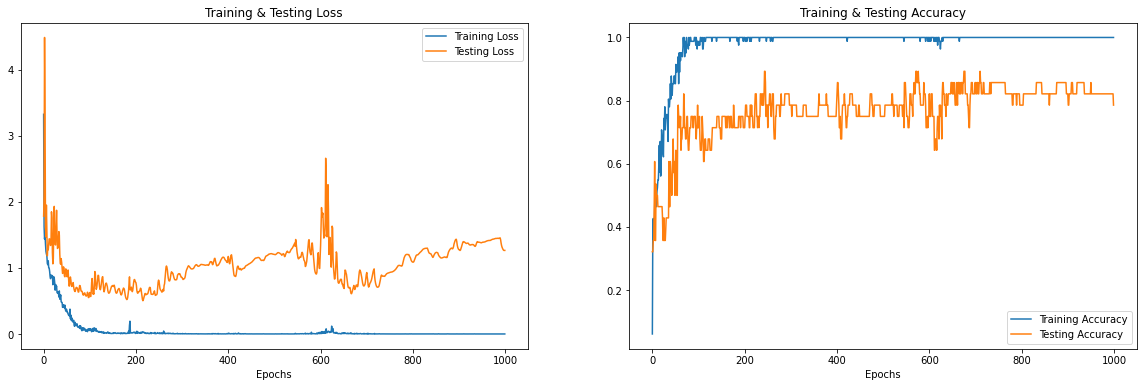

In [43]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(1000)]
fig , ax = plt.subplots(1,2)
train_acc = cnnhistory.history['accuracy']
train_loss = cnnhistory.history['loss']
test_acc = cnnhistory.history['val_accuracy']
test_loss = cnnhistory.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()